# Linear Regression (just for fun)
For Ambrosia only

## Libraries to perfom analysis

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Get pollen and weather data from csv

In [19]:
pol_wu_df = pd.read_csv('../analyze/pol_wu_test.csv')

In [ ]:
pol_wu_df.head()

In [ ]:
pol_wu_df.describe()

In [ ]:
pol_wu_df.info()

## Split train and test data

In [ ]:
list(pol_wu_df)

In [20]:
x_data = pol_wu_df.drop(['Date','Year','Ambrosia','Artemisia','Asteraceae','Alnus','Betula','Ericaceae','Carpinus',
'Castanea','Quercus','Chenopodium','Cupressaceae','Acer','Fraxinus','Gramineae','Fagus','Juncaceae','Aesculus',
'Larix','Corylus','Juglans','Umbellifereae','Ulmus','Urtica','Rumex','Populus','Pinaceae','Plantago','Platanus',
'Salix','Cyperaceae','Filipendula','Sambucus','Tilia','Events'],axis=1)

In [21]:
y_val = pol_wu_df['Ambrosia']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.3,random_state=42)

## Train model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.01071605  0.00048822  0.00382822  0.00496191 -0.00972197 -0.00029049
  0.00297373  0.0074021  -0.00200655  0.00138657  0.00026467 -0.00085259
 -0.00068784  0.00121863 -0.00019806  0.0015198   0.00554002  0.00071388
 -0.00146435 -0.00028728]


## Run model on test data

In [27]:
predictions = lm.predict( X_test)

## Check results / perf

Text(0,0.5,'Predicted Y')

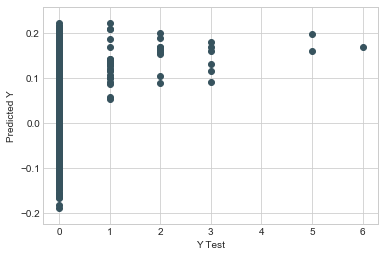

In [28]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [29]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10181753186
MSE: 0.0852408217023
RMSE: 0.291960308436


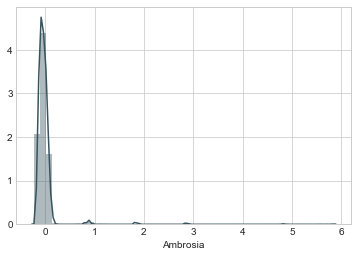

In [30]:
sns.distplot((y_test-predictions),bins=50);

In [31]:
coeffecients = pd.DataFrame(lm.coef_,x_data.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Month,-0.010716
DayOfYear,0.000488
TempMax,0.003828
TempAvg,0.004962
TempMin,-0.009722
DewPointMax,-0.000290
DewPointAvg,0.002974
DewPointMin,0.007402
HumidMax,-0.002007
HumidAvg,0.001387
